In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# LALSuite contains implementations of compact binary coalescence waveform models such as the IMRPhenomD model
import lal
import lalsimulation as ls

/var/folders/kj/vk6sy3f57kq6yyz9d_8ycwzr0000gn/T/ipykernel_1671/3568725639.py:2: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


MP Jan 11, 2024 -- Notes and expressions for IMRPhenomD waveform

# The IMRPhenomD waveform model

THe waveform model we will discuss here is called `PhenomD` or `IMRPhenomD`. It is an *inspiral-merger-ringdown* (IMR) model of the dominant $(\ell, m) = (2, \pm 2)$ spherical harmonic modes of the gravitational waves emitted in the inspiral and merger of a binary black hole (BBH) system. In simplified terms, the time-domain waveform from such a coalescence is a chirp whose amplitude and frequency increase as the system approaches merger. GW data analysis is usually done in the Fourier domain because there is a natural noise-weighted inner product between waveforms in the Fourier domain $\langle h_1, h_2 \rangle = 4\mathrm{Re} \int_0^\infty \frac{\tilde h_1(f), \tilde h_2(f)^*}{S_n(f)} \mathrm{d}f$, where $S_n(f)$ is the (one-sided) power spectral density of the detector noise.

Therefore, the family of phenomenological waveform models is usually constructed directly in the Fourier domain. This approach matches a *post-Newtonian* (PN) inspiral to a phenomenological description of the merger and ringdown which aims at encapsulating the waveform morphology from numerical-relativity simulations. The method posits ansatz functions in the Fourier domain for different regimes of the coalescence along with a polynomial dependence on mass-ratio and spins. The coefficients in the ansatz functions are determined by fitting available numerical relativity simulations (obtained from solving the 3D Einstein's equations on a supercomputer).

The IMRPhenomD waveform model is discussed in Khan et al, https://arxiv.org/pdf/1508.07253.pdf. While there are newer phenomenological models which contain more physics, this one will serve for this project. If it turns out to be too complicated we may even want to simplify it further to reduce the number of terms and the parameter dependencies to be modelled.

A simplified expression for the dominant mode of the GW strain in the Fourier domain can be obtained from time domain waveform using the stationary phase approximation


$$
\tilde h(f) = \mathcal{A} \, f^{-7/6} \, e^{i \psi(f)},
$$

where the amplitude

$$
\mathcal{A} \propto \mathcal{M}^{5/6} Q(angles) / D
$$

depends on the chirp mass $\mathcal{M} = M \eta^{3/5}$ with the total mass $M = m_1 + m_2$ and the symmetric mass-ratio $\eta = (m_1 m_2)/M^2$, and the luminosity distance $D$. The angular dependence comes from the response of the GW detector which depends on the location of the source with respect to the reference frame of the GW detector and the inclination angle under which the source is observed.

The waveform model is composed of different parts in dimensionless frequency $M f$ which correspond to different stages of the coalescence (see Fig. 4)

* Region I: inspiral
* Region II
  * Region IIa: intermediate
  * Region IIb: merger-ringdown


* Interface between regions I and IIa: $Mf = 0.018$.
* Interface between regions IIa and IIb: $Mf = 0.5 f_\mathrm{RD}$.

## Amplitude

The simple inspiral amplitude $\mathcal{A} f^{-7/6}$ does not properly describe the merger and ringdown stages of the coalescence. In the ringdown, the system is a perturbed Kerr BH which relaxes towards the stationary Kerr solution under the emission of quasinormal ringing (damped sinusoidal oscillations). To reflect this behavior in the Fourier domain, the Fourier domain amplitude needs to decay quite rapidly once it reaches the ringdown frequency $f_\mathrm{RD}$. This frequency depends on binary parameters (masses and spins) and encodes how fast (and at what frequency) a particular binary merges.

Base amplitude

$$
A_\mathrm{PN}(f) = A_0 \sum_{i=0}^6 \mathcal{A}_i (\pi f)^{i/3},
$$

where $A_0$ is the leading order $f^{-7/6}$ behavior. Adding higher order terms the inspiral amplitude is

$$
A_\mathrm{Ins} = A_\mathrm{PN} + A_0\sum{i=1}^3 \rho_i f^{(6+i)/3}
$$

FIXME: $f$ should appear as $Mf$ to make it dimensionless. Check implementation.

Region IIa

$$
A_\mathrm{Int} = A_0 \left( \delta_0 + \delta_1 f + \delta_2 f^2 + \delta_3 f^3 + \delta_4 f^4 \right)
$$

Region IIb - merger-ringdown

The Fourier transform of the (two-sided) exponential decay function is a Lorentzian (Eq 19)

$$
\frac{A_\mathrm{MR}}{A_0} = \gamma_1 \frac{\gamma_3 f_\mathrm{damp}}{(f - f_\mathrm{RD})^2 + (\gamma_3 f_\mathrm{damp})^2}
\exp\left( \frac{\gamma_2 (f - f_\mathrm{RD})}{\gamma_3 f_\mathrm{damp}} \right)
$$

## Phase

The full PN inspiral phase (referred to as the `TaylorF2` approximant obtained via stationary phase approximation of the time domain waveform) is

$$
\phi_\mathrm{TF2} = 2\pi f t_c - \varphi_c - \pi/4 + \frac{3}{128\eta} (\pi M f)^{-5/3} \sum_{i=0}^7 \varphi_i(\Xi)(\pi M f)^{i/3},
$$

where $\varphi_i(\Xi)$ are PN expansion coefficients which depend on the intrinsic binary parameters (masses and spins of the black holes). $M$ is the total mass, $f$ the frequency, so that $Mf$ is dimensionless (e.g. $f$ in Hz and $M$ in seconds assuming $G=c=1$). $t_c, \varphi_c$ are the coalescence time and phase, two constants that relate to the merger in the time domain. It should be noted that the PN theory cannot describe the merger of the system because it is an expansion in powers of $v/c$ and near merger $v \sim 0.5 c$. Above, $v/c = (\pi Mf)^{1/3}$ is the expansion parameter.

The inspiral phase ansatz includes unknown PN coefficients beyond 3.5PN order ($i=7$)

$$
\phi_\mathrm{Ins} = \phi_\mathrm{TF2}(Mf; \Xi) + \frac{1}{\eta} \left( \sigma_0 + \sigma_1 f + \frac{3}{4}\sigma_2 f^{4/3} + \frac{3}{5}\sigma_3 f^{5/3} + \frac{1}{2}\sigma_4 f^2\right)
$$

Region IIa - intermediate (Eq 16)

$$
\phi_\mathrm{Int} = \frac{1}{\eta} \left( \beta_0 + \beta_1 f + \beta_2 \log(f) - \frac{\beta_3}{3}f^{-3} \right)
$$

Phase and time-shift constants $\beta_0, \beta_1$ will be fixed by requiring a smooth connection to region I.

Region IIb - merger-ringdown (Eq 14)

$$
\phi_\mathrm{MR} = \frac{1}{\eta}
\left\{
\alpha_0 + \alpha_1 f - \alpha_2 f^{-1} + \frac{4}{3}\alpha_3 f^{3/4} + \alpha_4 \arctan \left( \frac{f - \alpha_5 f_\mathrm{RD}}{f_\mathrm{damp}} \right)
\right\}
$$

Phase and time-shift constants $\alpha_0, \alpha_1$ will be fixed by requiring a smooth connection to region IIa.

## Implementation in LALSuite

Because there is a Python version available there should not be a need to extract the expressions from the C code


* https://git.ligo.org/lscsoft/lalsuite/-/blob/master/lalsimulation/lib/LALSimIMRPhenomD.c
  * `XLALSimIMRPhenomDGenerateFD()`
  * `IMRPhenomDPhaseFrequencySequence()`
  * `IMRPhenomDAmpFrequencySequence()`
  * `IMRPhenomDSetupAmpAndPhaseCoefficients()`
* https://git.ligo.org/lscsoft/lalsuite/-/blob/master/lalsimulation/lib/LALSimIMRPhenomD_internals.c
  * `fring()` real part of ringdown frequency
  * `fdamp()` complex part of ringdown frequency
  * Various fitting functions e.g. `rho1_fun()`, `gamma1_fun()`, `delta0_fun()`
  * `AmpInsAnsatz()`
  * `AmpMRDAnsatz()`
  * `AmpIntAnsatz()`
  * `IMRPhenDAmplitude()`
  * Various fitting functions `alpha1Fit()`, `beta1Fit()`, `sigma1Fit()`,
  * `PhiMRDAnsatzInt()`
  * `PhiIntAnsatz()`
  * `PhiInsAnsatzInt()`
  * `ComputeIMRPhenomDPhaseCoefficients()`
  * `ComputeIMRPhenDPhaseConnectionCoefficients()`
  * `IMRPhenDPhase()`


### Standalone implementation in C

https://github.com/eXtremeGravityInstitute/LISA-Massive-Black-Hole/blob/main/IMRPhenomD.c

### Python implementation

Below I'll copy pieces of code from the Python implementation at https://github.com/XGI-MSU/PyIMRPhenomD.

https://github.com/XGI-MSU/PyIMRPhenomD/blob/master/IMRPhenomD_internals.py implements [`IMRPhenDPhase()`](https://github.com/XGI-MSU/PyIMRPhenomD/blob/master/IMRPhenomD_internals.py#L773), `IMRPhenDAmplitude()`
  * [`PNPhasingSeriesTaylorF2()`](https://github.com/XGI-MSU/PyIMRPhenomD/blob/master/IMRPhenomD_internals.py#L60)
  * [`PhiInsAnsatzInt()`](https://github.com/XGI-MSU/PyIMRPhenomD/blob/master/IMRPhenomD_internals.py#L662)
  * [`PhiIntAnsatz()`](https://github.com/XGI-MSU/PyIMRPhenomD/blob/master/IMRPhenomD_internals.py#L586)
  * [`PhiMRDAnsatzInt()`](https://github.com/XGI-MSU/PyIMRPhenomD/blob/master/IMRPhenomD_internals.py#L540)


`vi` and `vlogvi` below are the parameter dependent coefficients for the PN inspiral waveform (TaylorF2)

```
pfaN = 3/(128*eta)
v = pfaN*(v0, v1, v2, v3, v4, v5, v6, v7)
vlogv = pfaN*(0, 0, 0, 0, 0, vlogv5, vlogv6, 0)
```

In [3]:
# Equal-mass nonspinning BBH
eta, chi = 0.25, 0.0
chis, chia = 0.0, 0.0

In [4]:
# FIXME: store in file - DONE

#deleted second and second to last values so grid is uniform spaced
NQ = 1001
QNMData_a = np.linspace(-1.,1.,NQ)

QNMData_fring = np.loadtxt('fring.txt')

QNMData_fdamp = np.loadtxt('fdamp.txt')

In [5]:
def EradRational0815(eta, chis, chia):
    """Wrapper function for EradRational0815_s. arXiv:1508.07250
    convention m1>=m2"""
    #"""Formula to predict the total radiated energy. Equation 3.7 and 3.8 arXiv:1508.07250
    #Input parameter s defined around Equation 3.7 and 3.8."""
    if eta < 0.25:
        Seta = np.sqrt(1-4*eta)
    else:
        Seta = 0.
    s = chis + chia*Seta/(1-2*eta)
    return ((0.055974469826360077*eta + 0.5809510763115132*eta**2 - 0.9606726679372312*eta**3 + 3.352411249771192*eta**4) \
            *(1. + (-0.0030302335878845507 - 2.0066110851351073*eta + 7.7050567802399215*eta**2)*s)) \
            /(1. + (-0.6714403054720589 - 1.4756929437702908*eta + 7.304676214885011*eta**2)*s)

def FinalSpin0815(eta, chis, chia):
    """Formula to predict the final spin. Equation 3.6 arXiv:1508.07250
    s defined around Equation 3.6."""
    if eta < 0.25:
        Seta = np.sqrt(1-4*eta)
    else:
        Seta = 0.
    s = chis*(1-2*eta) + chia*Seta
    return 3.4641016151377544*eta - 4.399247300629289*eta**2 +9.397292189321194*eta**3 - 13.180949901606242*eta**4 \
            +(1 - 0.0850917821418767*eta - 5.837029316602263*eta**2)*s \
            +(0.1014665242971878*eta - 2.0967746996832157*eta**2)*s**2\
            +(-1.3546806617824356*eta + 4.108962025369336*eta**2)*s**3\
            +(-0.8676969352555539*eta + 2.064046835273906*eta**2)*s**4

from scipy.interpolate import InterpolatedUnivariateSpline

def fringdown(eta, chis, chia, finspin):
    denom = (1-EradRational0815(eta, chis, chia))
    fring_interp = InterpolatedUnivariateSpline(QNMData_a, QNMData_fring ,k=3, ext=2)
    fdamp_interp = InterpolatedUnivariateSpline(QNMData_a, QNMData_fdamp, k=3, ext=2)
    fRD = fring_interp(np.array([finspin]))[0] / denom
    fDM = fdamp_interp(np.array([finspin]))[0] / denom
    return fRD,fDM

In [6]:
# Determine properties of final black hole needed for merger-ringdown model
finspin = FinalSpin0815(eta, chis, chia)
fRD, fDM = fringdown(eta, chis, chia, finspin)

finspin, fRD, fDM

(0.6864170524001022, 0.0880868156020031, 0.013595526766895408)

In [7]:
GAMMA = 0.577215664901532860606512090082402431
PHI_fJoin_INS = 0.018

def PNPhasingSeriesTaylorF2(eta, chis, chia):
    if eta < 0.25:
        delta = np.sqrt(1-4*eta)
    else:
        delta = 0.

    #Use the spin-orbit variables from arXiv:1303.7412, Eq. 3.9
    #We write dSigmaL for their (\delta m/m) * \Sigma_\ell
    #There's a division by mtotal^2 in both the energy and flux terms
    #We just absorb the division by mtotal^2 into SL and dSigmaL/
    SL = chis*(1-2*eta) + chia*delta
    dSigmaL = -delta*(chis*delta + chia)

    pfaN = 3/(128*eta)

    #    /* Non-spin phasing terms - see arXiv:0907.0700, Eq. 3.18 */
    v0 = 1.
    v1 = 0.
    v2 = 5/9*(743/84+11*eta)
    v3 = -16*np.pi
    v4 = 5/72*(3058673/7056+5429/7*eta+617*eta**2)
    v5 = 5/9*np.pi*(7729/84-13*eta)
    vlogv5 = 5/3*np.pi*(7729/84-13*eta)
    v6 = (11583231236531/4694215680-640/3*np.pi**2-6848/21*GAMMA) \
                +(-15737765635/3048192+2255/12*np.pi**2)*eta+76055/1728*eta**2-127825/1296*eta**3 \
                +-6848/21*np.log(4.)
    vlogv6 = -6848/21
    v7 = np.pi*(77096675/254016+378515/1512*eta-74045/756*eta**2)

    #     Compute 2.0PN SS, QM, and self-spin */
    #     See Eq. (6.24) in arXiv:0810.5336
    #     9b,c,d in arXiv:astro-ph/0504538
    pn_sigma = 1/16*(chia**2*(81 - 320*eta) + chis**2*(81 - 4*eta) + 162*chis*chia*delta)

    pn_ss3 = 0.

    #     Spin-orbit terms - can be derived from arXiv:1303.7412, Eq. 3.15-16 */
    pn_gamma = (554345/1134+110/9*eta)*SL+(13915/84-10/3*eta)*dSigmaL

    v7 += (-8980424995/762048+6586595/756*eta-305/36*eta**2)*SL-(170978035/48384-2876425/672*eta-4735/144*eta**2)*dSigmaL
    v6 += np.pi/3*(3760*SL+1490*dSigmaL)+pn_ss3
    v5 += -pn_gamma
    vlogv5 += -3*pn_gamma
    v4 += -10*pn_sigma
    v3 += 188/3*SL+25*dSigmaL

    #     At the very end, multiply everything in the series by pfaN */
    v = (pfaN*v0,pfaN*v1,pfaN*v2,pfaN*v3,pfaN*v4,pfaN*v5,pfaN*v6,pfaN*v7)
    vlogv = (0.,0.,0.,0.,0.,pfaN*vlogv5,pfaN*vlogv6,0.)

    return v, vlogv

In [8]:
def sigmaFits(eta, chi):
    """sigma_i i=1,2,3,4 are the phenomenological inspiral coefficients depending on eta and chiPN
    PhiInsAnsatzInt is a souped up TF2 phasing which depends on the sigma_i coefficients
    See corresponding row in Table 5 arXiv:1508.07253"""
    xi = -1 + chi
    sigma1 = 2096.551999295543 + 1463.7493168261553*eta \
        + (1312.5493286098522 + 18307.330017082117*eta - 43534.1440746107*eta**2)*xi \
        + (-833.2889543511114 + 32047.31997183187*eta - 108609.45037520859*eta**2)*xi**2 \
        + (452.25136398112204 + 8353.439546391714*eta - 44531.3250037322*eta**2)*xi**3
    sigma2 = -10114.056472621156 - 44631.01109458185*eta \
        + (-6541.308761668722 - 266959.23419307504*eta + 686328.3229317984*eta**2)*xi \
        + (3405.6372187679685 - 437507.7208209015*eta + 1.6318171307344697e6*eta**2)*xi**2 \
        + (-7462.648563007646 - 114585.25177153319*eta + 674402.4689098676*eta**2)*xi**3
    sigma3 = 22933.658273436497 + 230960.00814979506*eta \
        + (14961.083974183695 + 1.1940181342318142e6*eta - 3.1042239693052764e6*eta**2)*xi \
        + (-3038.166617199259 + 1.8720322849093592e6*eta - 7.309145012085539e6*eta**2)*xi**2 \
        + (42738.22871475411 + 467502.018616601*eta - 3.064853498512499e6*eta**2)*xi**3
    sigma4 = -14621.71522218357 - 377812.8579387104*eta \
        + (-9608.682631509726 - 1.7108925257214056e6*eta + 4.332924601416521e6*eta**2)*xi \
        + (-22366.683262266528 - 2.5019716386377467e6*eta + 1.0274495902259542e7*eta**2)*xi**2 \
        + (-85360.30079034246 - 570025.3441737515*eta + 4.396844346849777e6*eta**2)*xi**3
    return (sigma1,sigma2,sigma3,sigma4)

In [9]:
def PhiInsAnsatzIntFromCoeffs(eta, chi, chis, chia):
    v, vlogv = PNPhasingSeriesTaylorF2(eta, chis, chia)

    # terms related to the above PN phasing series
    minus_five_thirds = v[0]/np.pi**(5/3)
    minus_one = v[2]/np.pi
    minus_two_thirds = v[3]/np.pi**(2/3)
    minus_third = v[4]/np.pi**(1/3)
    initial_phasing = v[5]-np.pi/4
    third = v[6]*np.pi**(1/3)
    two_thirds = v[7]*np.pi**(2/3)

    zero_with_logv = vlogv[5]
    third_with_logv = vlogv[6]*np.pi**(1/3)

    #higher order terms that were calibrated for PhenomD
    sigmas = sigmaFits(eta, chi)
    one = sigmas[0]/eta
    four_thirds = 3/4*sigmas[1]/eta
    five_thirds = 3/5*sigmas[2]/eta
    two = 1/2*sigmas[3]/eta
    prefactors_ini = (minus_five_thirds, minus_one, minus_two_thirds, minus_third, \
                            initial_phasing, third, two_thirds, one, four_thirds, five_thirds, two)
    prefactors_log = (zero_with_logv,third_with_logv)
    return prefactors_ini, prefactors_log

In [10]:
p_ini, p_log = PhiInsAnsatzIntFromCoeffs(eta, chi, chis, chia)

In [11]:
from sympy import Symbol, pi, log, exp, sqrt, atan, simplify, expand, diff
from sympy import init_printing

init_printing()

Mf = Symbol('M')
v = Symbol('v')
v = (pi*Mf)**(1/3)
logv = expand(log(v))
fv = (Mf)**(1/3)

# FIXME: check that this is correct (powers of pi have been factored out in PhiInsAnsatzIntFromCoeffs())
PhiIns = 1/fv**5 * (p_ini[0] \
        + p_ini[1] * fv**2 \
        + p_ini[2] * fv**3\
        + p_ini[3] * fv**4\
        + (p_ini[4] + p_log[0]*logv) * fv**5\
        + (p_ini[5] + p_log[1]*logv) * fv**6\
        + p_ini[6] * fv**7\
        + p_ini[7] * fv**8\
        + p_ini[8] * fv**9\
        + p_ini[9] * fv**10\
        + p_ini[10] * fv**11\
        )
str(PhiIns)

'(0.192233276998395*M**0.666666666666667 - 2.19688783134229*M**1.0 + 2.96024568849217*M**1.33333333333333 + M**1.66666666666667*(14.5236327040957*log(M) + 13.7382345406982 + 14.5236327040957*log(pi)) + M**2.0*(-14.9248887589603*log(M) - 151.602171055319 - 14.9248887589603*log(pi)) + 227.418872661984*M**2.33333333333333 - 291.846189618398*M**2.66666666666667 - 2730.3817082861*M**3.0 + 3143.98200779746*M**3.33333333333333 + 9618.72578330961*M**3.66666666666667 + 0.0139119547125656)/M**1.66666666666667'

In [12]:
def betaFits(eta, chi):
    """beta_i i=1,2,3 are the phenomenological intermediate coefficients depending on eta and chiPN
    PhiIntAnsatz is the intermediate phasing in terms of the beta_i coefficients
    [Beta]1Fit = PhiIntFitCoeff[Chi]PNFunc[[Eta], [Chi]PN][[1]]"""
    xi = -1 + chi
    beta1 = 97.89747327985583 - 42.659730877489224*eta \
            + (153.48421037904913 - 1417.0620760768954*eta + 2752.8614143665027*eta**2)*xi \
            + (138.7406469558649 - 1433.6585075135881*eta + 2857.7418952430758*eta**2)*xi**2 \
            + (41.025109467376126 - 423.680737974639*eta + 850.3594335657173*eta**2)*xi**3
    beta2 = -3.282701958759534 - 9.051384468245866*eta \
            + (-12.415449742258042 + 55.4716447709787*eta - 106.05109938966335*eta**2)*xi \
            + (-11.953044553690658 + 76.80704618365418*eta - 155.33172948098394*eta**2)*xi**2 \
            + (-3.4129261592393263 + 25.572377569952536*eta - 54.408036707740465*eta**2)*xi**3
    beta3 = -0.000025156429818799565 + 0.000019750256942201327*eta \
            + (-0.000018370671469295915 + 0.000021886317041311973*eta + 0.00008250240316860033*eta**2)*xi \
            + (7.157371250566708e-6 - 0.000055780000112270685*eta + 0.00019142082884072178*eta**2)*xi**2 \
            + (5.447166261464217e-6 - 0.00003220610095021982*eta + 0.00007974016714984341*eta**2)*xi**3
    return beta1, beta2, beta3

In [13]:
def PhiIntAnsatzFromCoeffs(eta, chi):
    """ansatz for the intermediate phase defined by Equation 16 arXiv:1508.07253"""
    betas = betaFits(eta, chi)
    return  betas[0]/eta*Mf - betas[2]/eta/3/Mf**3 + betas[1]/eta*log(Mf) # relies on global Mf, log

In [14]:
PhiInt = PhiIntAnsatzFromCoeffs(eta, chi)
str(PhiInt)

'346.570039045353*M - 9.63599141522925*log(M) + 1.29058693573989e-5/M**3'

In [15]:
def alphaFits(eta, chi):
    """alpha_i i=1,2,3,4,5 are the phenomenological intermediate coefficients depending on eta and chiPN
    PhiRingdownAnsatz is the ringdown phasing in terms of the alpha_i coefficients
    See corresponding row in Table 5 arXiv:1508.07253"""
    xi = -1 + chi
    alpha1 = 43.31514709695348 + 638.6332679188081*eta \
            + (-32.85768747216059 + 2415.8938269370315*eta - 5766.875169379177*eta**2)*xi \
            + (-61.85459307173841 + 2953.967762459948*eta - 8986.29057591497*eta**2)*xi**2 \
            + (-21.571435779762044 + 981.2158224673428*eta - 3239.5664895930286*eta**2)*xi**3
    alpha2 = -0.07020209449091723 - 0.16269798450687084*eta \
            + (-0.1872514685185499 + 1.138313650449945*eta - 2.8334196304430046*eta**2)*xi \
            + (-0.17137955686840617 + 1.7197549338119527*eta - 4.539717148261272*eta**2)*xi**2 \
            + (-0.049983437357548705 + 0.6062072055948309*eta - 1.682769616644546*eta**2)*xi**3
    alpha3 = 9.5988072383479 - 397.05438595557433*eta \
            + (16.202126189517813 - 1574.8286986717037*eta + 3600.3410843831093*eta**2)*xi \
            + (27.092429659075467 - 1786.482357315139*eta + 5152.919378666511*eta**2)*xi**2 \
            + (11.175710130033895 - 577.7999423177481*eta + 1808.730762932043*eta**2)*xi**3
    alpha4 = -0.02989487384493607 + 1.4022106448583738*eta \
            + (-0.07356049468633846 + 0.8337006542278661*eta + 0.2240008282397391*eta**2)*xi \
            + (-0.055202870001177226 + 0.5667186343606578*eta + 0.7186931973380503*eta**2)*xi**2 \
            + (-0.015507437354325743 + 0.15750322779277187*eta + 0.21076815715176228*eta**2)*xi**3
    alpha5 = 0.9974408278363099 - 0.007884449714907203*eta \
            + (-0.059046901195591035 + 1.3958712396764088*eta - 4.516631601676276*eta**2)*xi \
            + (-0.05585343136869692 + 1.7516580039343603*eta - 5.990208965347804*eta**2)*xi**2 \
            + (-0.017945336522161195 + 0.5965097794825992*eta - 2.0608879367971804*eta**2)*xi**3
    return alpha1, alpha2, alpha3, alpha4, alpha5

In [16]:
fRD = Symbol('fRD')
fDM = Symbol('fDM')

def PhiMRDAnsatzInt(Mf, fRD, fDM, eta, chi):
    """Ansatz for the merger-ringdown phase Equation 14 arXiv:1508.07253"""
    alphas = alphaFits(eta, chi)
    # fq = np.sqrt(np.sqrt(Mf))
    fq = Mf**(1/4)
    return alphas[0]/eta*Mf - alphas[1]/eta/Mf + 4/3/eta*alphas[2]*fq**3 + alphas[3]/eta*atan((Mf-alphas[4]*fRD)/fDM)

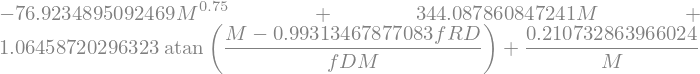

In [17]:
PhiMRD = PhiMRDAnsatzInt(Mf, fRD, fDM, eta, chi)
PhiMRD

In [18]:
PHI_fJoin_INS = 0.018
fMRDJoinPhi = fRD/2

def ComputeIMRPhenDPhaseConnectionCoefficientsSympy(PhiIns, PhiInt, PhiMRD, Mf, PHI_fJoin_INS, fMRDJoinPhi):
    """This function aligns the three phase parts (inspiral, intermediate and merger-rindown)
    such that they are c^1 continuous at the transition frequencies
    Defined in VIII. Full IMR Waveforms arXiv:1508.07253"""

    # Compute frequency derivatives of phase parts
    DPhiIns = diff(PhiIns, Mf)
    DPhiInt = diff(PhiInt, Mf)
    DPhiMRD = diff(PhiMRD, Mf)

    # Following ComputeIMRPhenDPhaseConnectionCoefficients
    #   Compute C1Int and C2Int coeffs
    DPhiIns_ = DPhiIns.evalf(subs={Mf: PHI_fJoin_INS})
    DPhiInt_ = DPhiInt.evalf(subs={Mf: PHI_fJoin_INS})
    C2Int = DPhiIns_ - DPhiInt_
    #
    phiC1_ref = PhiIns.evalf(subs={Mf: PHI_fJoin_INS})
    C1Int = phiC1_ref - PhiInt.evalf(subs={Mf: PHI_fJoin_INS}) - C2Int*PHI_fJoin_INS

    #   Compute C1MRD and C2MRD coeffs
    PhiIntTempVal = PhiInt.evalf(subs={Mf: fMRDJoinPhi}) + C1Int + C2Int*fMRDJoinPhi
    DPhiIntTempVal = C2Int + DPhiInt.evalf(subs={Mf: fMRDJoinPhi})
    DPhiMRDVal = DPhiMRD.evalf(subs={Mf: fMRDJoinPhi})
    C2MRD = DPhiIntTempVal - DPhiMRDVal
    C1MRD = PhiIntTempVal - PhiMRD.evalf(subs={Mf: fMRDJoinPhi}) - C2MRD*fMRDJoinPhi

    return C1Int, C2Int, C1MRD, C2MRD

In [19]:
C1Int, C2Int, C1MRD, C2MRD = ComputeIMRPhenDPhaseConnectionCoefficientsSympy(PhiIns, PhiInt, PhiMRD, Mf, PHI_fJoin_INS, fMRDJoinPhi)
str([C1Int, C2Int, C1MRD, C2MRD])

'[-97.8810380701366, -1.54184219500473, 45.7389805176168*fRD**0.75 - fRD*(68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2)))/2 + 0.470168001553475*fRD - 9.63599141522925*log(fRD/2) + 1.06458720296323*atan(0.49313467877083*fRD/fDM) - 97.8810380701366 - 0.421465727932047/fRD + 0.000103246954859191/fRD**3, 68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2))]'

In [20]:
#time shift so that peak amplitude is approximately at t=0
#For details see https:#www.lsc-group.phys.uwm.edu/ligovirgo/cbcnote/WaveformsReview/IMRPhenomDCodeReview/timPD_EDOMain
# TTRef = -DPhiMRD(fMRDJoinAmp,fRD,fDM,eta,chi)
TTRef = 0.0 # ignore this for now; we don't need to follow LAL conventions here

TTRefIns = TTRef
TTRefInt = TTRef + C2Int
TTRefMRD = TTRef + C2MRD

str([TTRefIns, TTRefInt, TTRefMRD])

'[0.0, -1.54184219500473, 68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2))]'

In [21]:
MfRef = 0.001 # ignore this for now
phi0 = 0.0
# if fRef_in == 0.:
#     MfRef = min(fMRDJoinAmp, Mfs[itrFCut-1])
# else:
#     MfRef = fRef_in
if MfRef < PHI_fJoin_INS:
    phifRef = PhiIns.evalf(subs={Mf: MfRef})
elif MfRef < fMRDJoinPhi:
    phifRef = PhiInt.evalf(subs={Mf: MfRef}) + C1Int + C2Int*MfRef
else:
    phifRef = PhiMRD.evalf(subs={Mf: MfRef}) + C1MRD + C2MRD*MfRef

phifRef += 2*phi0 + TTRef*MfRef
phifRefIns = phifRef
phifRefInt = phifRef-C1Int
phifRefMRD = phifRef-C1MRD

str([phifRefIns, phifRefInt, phifRefMRD])

'[1318.57198956936, 1416.45302763950, -45.7389805176168*fRD**0.75 + fRD*(68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2)))/2 - 0.470168001553475*fRD + 9.63599141522925*log(fRD/2) - 1.06458720296323*atan(0.49313467877083*fRD/fDM) + 1416.4530276395 + 0.421465727932047/fRD - 0.000103246954859191/fRD**3]'

In [22]:
# Compute aligned phase pieces (C^1 connections)
PhiIns_aligned = PhiIns - phifRefIns + TTRefIns*Mf
PhiInt_aligned = PhiInt - phifRefInt + TTRefInt*Mf
PhiMRD_aligned = PhiMRD - phifRefMRD + TTRefMRD*Mf

In [23]:
str(PhiIns_aligned)

'(0.192233276998395*M**0.666666666666667 - 2.19688783134229*M**1.0 + 2.96024568849217*M**1.33333333333333 + M**1.66666666666667*(14.5236327040957*log(M) + 13.7382345406982 + 14.5236327040957*log(pi)) + M**2.0*(-14.9248887589603*log(M) - 151.602171055319 - 14.9248887589603*log(pi)) + 227.418872661984*M**2.33333333333333 - 291.846189618398*M**2.66666666666667 - 2730.3817082861*M**3.0 + 3143.98200779746*M**3.33333333333333 + 9618.72578330961*M**3.66666666666667 + 0.0139119547125656)/M**1.66666666666667 - 1318.57198956936'

In [24]:
str(PhiInt_aligned)

'345.028196850348*M - 9.63599141522925*log(M) - 1416.4530276395 + 1.29058693573989e-5/M**3'

In [25]:
str(PhiMRD_aligned)

'-76.9234895092469*M**0.75 + M*(68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2))) + 344.087860847241*M + 45.7389805176168*fRD**0.75 - fRD*(68.6084707764252/fRD**0.25 + 0.94033600310695 - 19.2719828304585/fRD + 0.842931455864094/fRD**2 - 0.000619481729155146/fRD**4 - 1.06458720296323/(fDM*(1.0 + 0.243181811406409*fRD**2/fDM**2)))/2 + 0.470168001553475*fRD - 9.63599141522925*log(fRD/2) + 1.06458720296323*atan(0.49313467877083*fRD/fDM) + 1.06458720296323*atan((M - 0.99313467877083*fRD)/fDM) - 1416.4530276395 - 0.421465727932047/fRD + 0.000103246954859191/fRD**3 + 0.210732863966024/M'

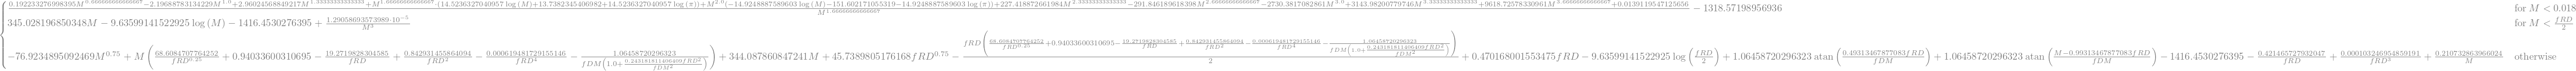

In [26]:
from sympy import Piecewise, lambdify
M = sympy.Symbol('M')
Phi_aligned = Piecewise((PhiIns_aligned, M < PHI_fJoin_INS), (PhiInt_aligned, M < fMRDJoinPhi), (PhiMRD_aligned, True))
# M = np.linspace(0.001, 0.1, 1000)
# phi_net_np = np.array([])
# for m in M:
#     Phi_align_try = np.piecewise(m,[m < PHI_fJoin_INS, (PHI_fJoin_INS <= m) and (m < fMRDJoinPhi), m >= fMRDJoinPhi],[lambda m: PhiIns_aligned, lambda m: PhiInt_aligned, lambda m: PhiMRD_aligned])
#     phi_net_np = np.append(phi_net_np,Phi_align_try)
#M = np.linspace(0.001, 0.1, 1000)
Phi_aligned

In [27]:
from sympy import latex
print(latex(Phi_aligned))

\begin{cases} \frac{0.192233276998395 M^{0.666666666666667} - 2.19688783134229 M^{1.0} + 2.96024568849217 M^{1.33333333333333} + M^{1.66666666666667} \cdot \left(14.5236327040957 \log{\left(M \right)} + 13.7382345406982 + 14.5236327040957 \log{\left(\pi \right)}\right) + M^{2.0} \left(- 14.9248887589603 \log{\left(M \right)} - 151.602171055319 - 14.9248887589603 \log{\left(\pi \right)}\right) + 227.418872661984 M^{2.33333333333333} - 291.846189618398 M^{2.66666666666667} - 2730.3817082861 M^{3.0} + 3143.98200779746 M^{3.33333333333333} + 9618.72578330961 M^{3.66666666666667} + 0.0139119547125656}{M^{1.66666666666667}} - 1318.57198956936 & \text{for}\: M < 0.018 \\345.028196850348 M - 9.63599141522925 \log{\left(M \right)} - 1416.4530276395 + \frac{1.29058693573989 \cdot 10^{-5}}{M^{3}} & \text{for}\: M < \frac{fRD}{2} \\- 76.9234895092469 M^{0.75} + M \left(\frac{68.6084707764252}{fRD^{0.25}} + 0.94033600310695 - \frac{19.2719828304585}{fRD} + \frac{0.842931455864094}{fRD^{2}} - \frac{

$$
\Phi(f) =
\begin{cases} \frac{0.192233276998395 Mf^{0.666666666666667} - 2.19688783134229 Mf^{1.0} + 2.96024568849217 Mf^{1.33333333333333} + Mf^{1.66666666666667} \cdot \left(14.5236327040957 \log{\left(Mf \right)} + 13.7382345406982 + 14.5236327040957 \log{\left(\pi \right)}\right) + Mf^{2.0} \left(- 14.9248887589603 \log{\left(Mf \right)} - 151.602171055319 - 14.9248887589603 \log{\left(\pi \right)}\right) + 227.418872661984 Mf^{2.33333333333333} - 291.846189618398 Mf^{2.66666666666667} - 2730.3817082861 Mf^{3.0} + 3143.98200779746 Mf^{3.33333333333333} + 9618.72578330961 Mf^{3.66666666666667} + 0.0139119547125656}{Mf^{1.66666666666667}} - 1318.57198956936
& \quad\text{for}\: Mf < 0.018 \\345.028196850348 Mf - 9.63599141522925 \log{\left(Mf \right)} - 1416.4530276395 + \frac{1.29058693573989 \cdot 10^{-5}}{Mf^{3}}
& \quad\text{for}\: Mf < 0.0440434078010015 \\- 76.9234895092469 Mf^{0.75} + 343.539993194852 Mf + 1.06458720296323 \operatorname{atan}{\left(73.5536045896333 Mf - 6.434621682321 \right)} - 1382.18706581227 + \frac{0.210732863966024}{Mf} & \quad\text{otherwise} \end{cases}
$$

In [28]:
Phi_aligned_numpy = lambdify([Mf,fRD,fDM], Phi_aligned, 'numpy') #-> problem lies here
print(dir(Phi_aligned_numpy))
#Phi_aligned_numpy = lambdify(Mf, Phi_aligned)
# def Phi_aligned_numpy(m):
#     return Phi_aligned(m)
Mfs = np.linspace(0.001, 0.1, 1000)

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


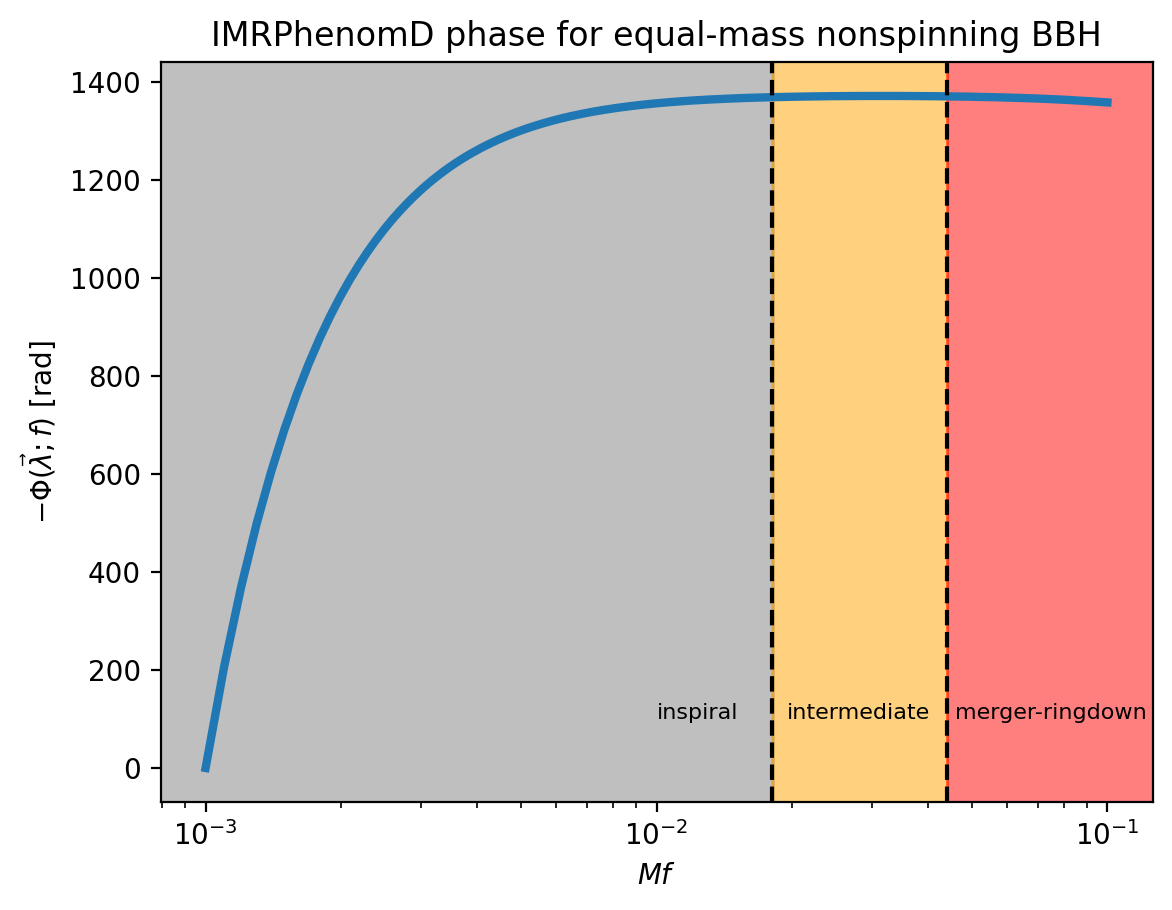

In [29]:
fRDi, fDMi = fringdown(eta, chis, chia, finspin)
PHI_fJoin_INS = 0.018
fMRDJoinPhi = fRDi/2
fig, ax = plt.subplots()
plt.semilogx(Mfs, -Phi_aligned_numpy(Mfs,fRDi,fDMi), lw=3)
plt.xlabel(r'$Mf$')
plt.ylabel(r'$-\Phi(\vec\lambda; f)$ [rad]')
plt.axvline(PHI_fJoin_INS, c='k', ls='--')
plt.axvline(fMRDJoinPhi, c='k', ls='--')
ax.add_patch(
    mpl.patches.Rectangle(
        (1e-4, -500),   # (x,y)
        PHI_fJoin_INS, 2000, # width, height
        fill=True, color='gray', alpha=0.5, zorder=1
    )
)
ax.add_patch(
    mpl.patches.Rectangle(
        (PHI_fJoin_INS, -500),   # (x,y)
        fMRDJoinPhi - PHI_fJoin_INS, 2000, # width, height
        fill=True, color='orange', alpha=0.5, zorder=1
    )
)
ax.add_patch(
    mpl.patches.Rectangle(
        (fMRDJoinPhi, -500),   # (x,y)
        0.2, 2000, # width, height
        fill=True, color='red', alpha=0.5, zorder=1
    )
)
plt.annotate('inspiral', (1e-2, 100), fontsize=8)
plt.annotate('intermediate', (1.95e-2, 100), fontsize=8)
plt.annotate('merger-ringdown', (4.6e-2, 100), fontsize=8)
plt.title('IMRPhenomD phase for equal-mass nonspinning BBH');

## Amplitude

In [30]:
def rho_funs(eta, chi):
    """Phenom coefficients rho1, ..., rho3 from direct fit
    AmpInsDFFitCoeffChiPNFunc[eta, chiPN]
    See corresponding row in Table 5 arXiv:1508.07253"""
    xi = -1 + chi
    rho1 = 3931.8979897196696 - 17395.758706812805*eta \
        + (3132.375545898835 + 343965.86092361377*eta - 1.2162565819981997e6*eta**2)*xi \
        + (-70698.00600428853 + 1.383907177859705e6*eta - 3.9662761890979446e6*eta**2)*xi**2 \
        + (-60017.52423652596 + 803515.1181825735*eta - 2.091710365941658e6*eta**2)*xi**3
    rho2 = -40105.47653771657 + 112253.0169706701*eta \
        + (23561.696065836168 - 3.476180699403351e6*eta + 1.137593670849482e7*eta**2)*xi \
        + (754313.1127166454 - 1.308476044625268e7*eta + 3.6444584853928134e7*eta**2)*xi**2 \
        + (596226.612472288 - 7.4277901143564405e6*eta + 1.8928977514040343e7*eta**2)*xi**3
    rho3 = 83208.35471266537 - 191237.7264145924*eta \
        + (-210916.2454782992 + 8.71797508352568e6*eta - 2.6914942420669552e7*eta**2)*xi \
        + (-1.9889806527362722e6 + 3.0888029960154563e7*eta - 8.390870279256162e7*eta**2)*xi**2 \
        + (-1.4535031953446497e6 + 1.7063528990822166e7*eta - 4.2748659731120914e7*eta**2)*xi**3
    return rho1, rho2, rho3


def AmpInsPrefactors(eta, chis, chia, rhos):
    chi1 = chis+chia
    chi2 = chis-chia
    rho1 = rhos[0]
    rho2 = rhos[1]
    rho3 = rhos[2]
    if eta < 0.25:
        Seta = np.sqrt(1-4*eta)
    else:
        Seta = 0.

    two_thirds = ((-969 + 1804*eta)*np.pi**(2/3))/672
    one = ((chi1*(81*(1 + Seta) - 44*eta) + chi2*(81 - 81*Seta - 44*eta))*np.pi)/48
    four_thirds = ((-27312085 - 10287648*chi2**2 - 10287648*chi1**2*(1 + Seta) + 10287648*chi2**2*Seta \
                    + 24*(-1975055 + 857304*chi1**2 - 994896*chi1*chi2 + 857304*chi2**2)*eta+ 35371056*eta**2) \
                    * np.pi**(4/3)) / 8128512
    five_thirds = (np.pi**(5/3) * (chi2*(-285197*(-1 + Seta) + 4*(-91902 + 1579*Seta)*eta - 35632*eta**2) \
                    + chi1*(285197*(1 + Seta) - 4*(91902 + 1579*Seta)*eta - 35632*eta**2) \
                    + 42840*(-1+4*eta)*np.pi)) / 32256
    two = - (np.pi**2*(-336*(-3248849057+2943675504*chi1**2 - 3339284256*chi1*chi2 + 2943675504*chi2**2)*eta**2 \
                    - 324322727232*eta**3- 7*(-177520268561 + 107414046432*chi2**2 + 107414046432*chi1**2*(1 + Seta) \
                    - 107414046432*chi2**2*Seta + 11087290368*(chi1 + chi2 + chi1*Seta - chi2*Seta)*np.pi) \
                    + 12*eta*(-545384828789 - 176491177632*chi1*chi2 + 202603761360*chi2**2 \
                    + 77616*chi1**2*(2610335 + 995766*Seta) - 77287373856*chi2**2*Seta \
                    + 5841690624*(chi1 + chi2)*np.pi + 21384760320*np.pi**2)))/60085960704
    seven_thirds = rho1
    eight_thirds = rho2
    three = rho3
    return two_thirds, one, four_thirds, five_thirds, two, seven_thirds, eight_thirds, three

In [31]:
def amp0Func(eta):
    """amplitude scaling factor defined by eq. 17 in 1508.07253"""
    return np.sqrt(2/3)/np.pi**(1/6)*np.sqrt(eta)

amp0 = 1 * amp0Func(eta)
amp_mult = 1.0

In [32]:
# AmpInsAnsatz()
rhos = rho_funs(eta, chi)
amp_prefactors = AmpInsPrefactors(eta, chis, chia, rhos)
AmpIns = amp_mult*1/sqrt(fv)**7*( \
              1 \
            + fv**2 * amp_prefactors[0] \
            + fv**3 * amp_prefactors[1] \
            + fv**4 * amp_prefactors[2] \
            + fv**5 * amp_prefactors[3] \
            + fv**6 * amp_prefactors[4] \
            + fv**7 * amp_prefactors[5] \
            + fv**8 * amp_prefactors[6] \
            + fv**9 * amp_prefactors[7] \
            )
DAmpIns = diff(AmpIns, Mf)
str(AmpIns)

'1.0*(-1.65346016027308*M**0.666666666666667 - 20.9165547229562*M**1.33333333333333 - 49.7411328692393*M**2.0 + 3732.32311535403*M**2.33333333333333 - 38985.411777689*M**2.66666666666667 + 97150.3925991756*M**3.0 + 1)/M**1.16666666666667'

In [33]:
AMP_fJoin_INS = 0.014

def gamma_funs(eta, chi):
    """Phenom coefficients gamma1, ..., gamma3
    AmpMRDAnsatzFunc[]
    See corresponding row in Table 5 arXiv:1508.07253"""
    xi = -1 + chi
    gamma1 = 0.006927402739328343 + 0.03020474290328911*eta \
            + (0.006308024337706171 - 0.12074130661131138*eta + 0.26271598905781324*eta**2)*xi \
            + (0.0034151773647198794 - 0.10779338611188374*eta + 0.27098966966891747*eta**2)*xi**2 \
            + (0.0007374185938559283 - 0.02749621038376281*eta + 0.0733150789135702*eta**2)*xi**3
    gamma2 = 1.010344404799477 + 0.0008993122007234548*eta \
            + (0.283949116804459 - 4.049752962958005*eta + 13.207828172665366*eta**2)*xi \
            + (0.10396278486805426 - 7.025059158961947*eta + 24.784892370130475*eta**2)*xi**2 \
            + (0.03093202475605892 - 2.6924023896851663*eta + 9.609374464684983*eta**2)*xi**3
    gamma3 = 1.3081615607036106 - 0.005537729694807678*eta \
            + (-0.06782917938621007 - 0.6689834970767117*eta + 3.403147966134083*eta**2)*xi \
            + (-0.05296577374411866 - 0.9923793203111362*eta + 4.820681208409587*eta**2)*xi**2 \
            + (-0.006134139870393713 - 0.38429253308696365*eta + 1.7561754421985984*eta**2)*xi**3
    return gamma1, gamma2, gamma3

def fmaxCalc(fRD, fDM, eta, chi):
    """Equation 20 arXiv:1508.07253 (called f_peak in paper)
    analytic location of maximum of AmpMRDAnsatz"""
    gammas = gamma_funs(eta, chi)
    gamma2 = gammas[1]
    gamma3 = gammas[2]
    #  # NOTE: There's a problem with this expression from the paper becoming imaginary if gamma2>=1
    #  # Fix: if gamma2 >= 1 then set the square root term to zero.
    if gamma2 <= 1:
        return np.abs(fRD + (fDM*(-1 + np.sqrt(1 - gamma2**2))*gamma3)/gamma2)
    else:
        return np.abs(fRD + (fDM*(-1)*gamma3)/gamma2)

In [34]:
fmaxCalc(fRD, fDM, eta, chi)

In [35]:
# AmpMRDAnsatz()
gamma1, gamma2, gamma3 = gamma_funs(eta, chi)
fDMgamma3 = fDM*gamma3
fminfRD = Mf - fRD
AmpMRD = amp_mult*fDMgamma3*gamma1 * 1/(Mf**(7/6)*(fminfRD**2+fDMgamma3**2)) * exp(-(gamma2/fDMgamma3)*fminfRD)
DAmpMRD = diff(AmpMRD, Mf)
str(AmpMRD)

'0.0223314133093818*fDM*exp(-0.644487671942311*(M - fRD)/fDM)/(M**1.16666666666667*(1.74724436683344*fDM**2 + (M - fRD)**2))'

In [36]:
def AmpIntColFitCoeff(eta, chi):
    """The function name stands for 'Amplitude Intermediate Collocation Fit Coefficient'
    This is the 'v2' value in Table 5 of arXiv:1508.07253"""
    xi = -1 + chi
    return 0.8149838730507785 + 2.5747553517454658*eta \
            + (1.1610198035496786 - 2.3627771785551537*eta + 6.771038707057573*eta**2)*xi \
            + (0.7570782938606834 - 2.7256896890432474*eta + 7.1140380397149965*eta**2)*xi**2 \
            + (0.1766934149293479 - 0.7978690983168183*eta + 2.1162391502005153*eta**2)*xi**3

In [37]:
def AmpInsAnsatz(Mfs,eta,chis,chia,chi,amp_mult=1.):
    """The Newtonian term in LAL is fine and we should use exactly the same (either hardcoded or call).
    We just use the Mathematica expression for convenience.
    Inspiral amplitude plus rho phenom coefficents. rho coefficients computed in rho_funs function.
    Amplitude is a re-expansion. See 1508.07253 and Equation 29, 30 and Appendix B arXiv:1508.07253 for details"""
    rhos = rho_funs(eta,chi)
    amp_prefactors = AmpInsPrefactors(eta,chis,chia,rhos)

    fv = Mfs**(1/3)
    Amps = amp_mult*1/np.sqrt(fv)**7*( \
              1 \
            + fv**2*amp_prefactors[0] \
            + fv**3*amp_prefactors[1] \
            + fv**4*amp_prefactors[2] \
            + fv**5*amp_prefactors[3] \
            + fv**6*amp_prefactors[4] \
            + fv**7*amp_prefactors[5] \
            + fv**8*amp_prefactors[6] \
            + fv**9*amp_prefactors[7] \
            )
    return Amps

def DAmpInsAnsatz(Mf,eta,chis,chia,chi,amp_mult=1.):
    """Take the AmpInsAnsatz expression pull of the f^7/6 and compute the first derivative
    with respect to frequency to get the expression below."""
    chi1 = chis+chia
    chi2 = chis-chia
    rhos = rho_funs(eta,chi)
    rho1 = rhos[0]
    rho2 = rhos[1]
    rho3 = rhos[2]
    if eta<0.25:
        Seta = np.sqrt(1-4*eta)
    else:
        Seta = 0.

    return amp_mult*(((-969 + 1804*eta)*np.pi**(2/3))/(1008.*Mf**(1/3)) \
            + ((chi1*(81*(1 + Seta) - 44*eta) + chi2*(81 - 81*Seta - 44*eta))*np.pi)/48. \
            + ((-27312085 - 10287648*chi2**2 - 10287648*chi1**2*(1 + Seta) \
            + 10287648*chi2**2*Seta + 24*(-1975055 + 857304*chi1**2 - 994896*chi1*chi2 + 857304*chi2**2)*eta \
            + 35371056*eta**2)*Mf**(1/3)*np.pi**(4/3))/6.096384e6 \
            + (5*Mf**(2/3)*np.pi**(5/3)*(chi2*(-285197*(-1 + Seta) \
            + 4*(-91902 + 1579*Seta)*eta - 35632*eta**2) + chi1*(285197*(1 + Seta) \
            - 4*(91902 + 1579*Seta)*eta - 35632*eta**2) + 42840*(-1 + 4*eta)*np.pi))/96768. \
            - (Mf*np.pi**2*(-336*(-3248849057 + 2943675504*chi1**2 - 3339284256*chi1*chi2 + 2943675504*chi2**2)*eta**2 - 324322727232*eta**3 \
            - 7*(-177520268561 + 107414046432*chi2**2 + 107414046432*chi1**2*(1 + Seta) - 107414046432*chi2**2*Seta \
            + 11087290368*(chi1 + chi2 + chi1*Seta - chi2*Seta)*np.pi) \
            + 12*eta*(-545384828789 - 176491177632*chi1*chi2 + 202603761360*chi2**2 + 77616*chi1**2*(2610335 + 995766*Seta) \
            - 77287373856*chi2**2*Seta + 5841690624*(chi1 + chi2)*np.pi + 21384760320*np.pi**2)))/3.0042980352e10 \
            + (7/3)*Mf**(4/3)*rho1 + (8/3)*Mf**(5/3)*rho2 + 3*Mf**2*rho3)

def AmpMRDAnsatz(Mfs,fRD,fDM,eta,chi,amp_mult=1.):
    """Ansatz for the merger-ringdown amplitude. Equation 19 arXiv:1508.07253"""
    gammas = gamma_funs(eta,chi)
    gamma1 = gammas[0]
    gamma2 = gammas[1]
    gamma3 = gammas[2]
    fDMgamma3 = fDM*gamma3
    fminfRD = Mfs - fRD
    #Amps = amp_mult*Mfs**(-7/6)*np.exp(-fminfRD*gamma2/fDMgamma3)*(fDMgamma3*gamma1)/(fminfRD**2+fDMgamma3**2)
    Amps = amp_mult*fDMgamma3*gamma1*1/(Mfs**(7/6)*(fminfRD**2+fDMgamma3**2))*np.exp(-(gamma2/fDMgamma3)*fminfRD)
    return Amps

def DAmpMRDAnsatz(f,fRD,fDM,eta,chi,amp_mult=1.):
    """first frequency derivative of AmpMRDAnsatz*f(7/6)"""
    gammas = gamma_funs(eta,chi)
    gamma1 = gammas[0]
    gamma2 = gammas[1]
    gamma3 = gammas[2]

    fDMgamma3 = fDM*gamma3
    fminfRD = f - fRD
    expfactor = np.exp((fminfRD*gamma2)/fDMgamma3)
    pow2pluspow2 = fminfRD**2 + fDMgamma3**2

    return amp_mult*((-2*fDM*fminfRD*gamma3*gamma1) / ( expfactor * pow2pluspow2**2) -(gamma2*gamma1) / ( expfactor * pow2pluspow2))


In [38]:
def ComputeDeltasFromCollocation(eta,chis,chia,chi,MfRD,MfDM):
    """Calculates delta_i's
    Method described in arXiv:1508.07253 section 'Region IIa - intermediate'"""
    # Three evenly spaced collocation points in the interval [f1,f3].
    f1 = 0.014
    f3 = fmaxCalc(MfRD,MfDM,eta,chi)
    dfx = (f3 - f1)/2
    f2 = f1 + dfx

    #amp_prefactors = AmpInsPrefactors(eta,chis,chia,rhos)

    #  # v1 is inspiral model evaluated at f1
    #  # d1 is derivative of inspiral model evaluated at f1
    #v1 = AmpInsAnsatz(np.zeros(1),np.array([f1]),eta,chis,chia,chi,0,1,1.)[0]*f1**(7/6)
    v1 = AmpInsAnsatz(f1,eta,chis,chia,chi,1.)*f1**(7/6)
    d1 = DAmpInsAnsatz(f1,eta,chis,chia,chi,1.)

    #  # v3 is merger-ringdown model evaluated at f3
    #  # d2 is derivative of merger-ringdown model evaluated at f3
    v3 = AmpMRDAnsatz(f3,MfRD,MfDM,eta,chi,1.)*f3**(7/6)
    d2 = DAmpMRDAnsatz(f3,MfRD,MfDM,eta,chi,1.)

    #  # v2 is the value of the amplitude evaluated at f2
    #  # they come from the fit of the collocation points in the intermediate region
    v2 = AmpIntColFitCoeff(eta, chi)

    #  # Now compute the delta_i's from the collocation coefficients
    #The following functions (delta{0,1,2,3,4}_fun) were derived
    #in mathematica according to
    #the constraints detailed in arXiv:1508.07253,
    #section 'Region IIa - intermediate'.
    #These are not given in the paper.
    #Can be rederived by solving Equation 21 for the constraints
    #given in Equations 22-26 in arXiv:1508.07253
    
    delta0 = -((d2*f1**5*f2**2*f3 - 2*d2*f1**4*f2**3*f3 + d2*f1**3*f2**4*f3 - d2*f1**5*f2*f3**2 + d2*f1**4*f2**2*f3**2
        - d1*f1**3*f2**3*f3**2 + d2*f1**3*f2**3*f3**2 + d1*f1**2*f2**4*f3**2 - d2*f1**2*f2**4*f3**2 + d2*f1**4*f2*f3**3 \
        + 2*d1*f1**3*f2**2*f3**3 - 2*d2*f1**3*f2**2*f3**3 - d1*f1**2*f2**3*f3**3 + d2*f1**2*f2**3*f3**3 - d1*f1*f2**4*f3**3 \
        - d1*f1**3*f2*f3**4 - d1*f1**2*f2**2*f3**4 + 2*d1*f1*f2**3*f3**4 + d1*f1**2*f2*f3**5 - d1*f1*f2**2*f3**5 \
        + 4*f1**2*f2**3*f3**2*v1 - 3*f1*f2**4*f3**2*v1 - 8*f1**2*f2**2*f3**3*v1 + 4*f1*f2**3*f3**3*v1 + f2**4*f3**3*v1 \
        + 4*f1**2*f2*f3**4*v1 + f1*f2**2*f3**4*v1 - 2*f2**3*f3**4*v1 - 2*f1*f2*f3**5*v1 + f2**2*f3**5*v1 - f1**5*f3**2*v2 \
        + 3*f1**4*f3**3*v2 - 3*f1**3*f3**4*v2 + f1**2*f3**5*v2 - f1**5*f2**2*v3 + 2*f1**4*f2**3*v3 - f1**3*f2**4*v3 \
        + 2*f1**5*f2*f3*v3 - f1**4*f2**2*f3*v3 - 4*f1**3*f2**3*f3*v3 + 3*f1**2*f2**4*f3*v3 - 4*f1**4*f2*f3**2*v3 \
        + 8*f1**3*f2**2*f3**2*v3 - 4*f1**2*f2**3*f3**2*v3) / ((f1 - f2)**2*(f1 - f3)**3*(f3-f2)**2))
    delta1 = -((-(d2*f1**5*f2**2) + 2*d2*f1**4*f2**3 - d2*f1**3*f2**4 - d2*f1**4*f2**2*f3 + 2*d1*f1**3*f2**3*f3 \
        + 2*d2*f1**3*f2**3*f3 - 2*d1*f1**2*f2**4*f3 - d2*f1**2*f2**4*f3 + d2*f1**5*f3**2 - 3*d1*f1**3*f2**2*f3**2 \
        - d2*f1**3*f2**2*f3**2 + 2*d1*f1**2*f2**3*f3**2 - 2*d2*f1**2*f2**3*f3**2 + d1*f1*f2**4*f3**2 + 2*d2*f1*f2**4*f3**2 \
        - d2*f1**4*f3**3 + d1*f1**2*f2**2*f3**3 + 3*d2*f1**2*f2**2*f3**3 - 2*d1*f1*f2**3*f3**3 - 2*d2*f1*f2**3*f3**3 \
        + d1*f2**4*f3**3 + d1*f1**3*f3**4 + d1*f1*f2**2*f3**4 - 2*d1*f2**3*f3**4 - d1*f1**2*f3**5 + d1*f2**2*f3**5 \
        - 8*f1**2*f2**3*f3*v1 + 6*f1*f2**4*f3*v1 + 12*f1**2*f2**2*f3**2*v1 - 8*f1*f2**3*f3**2*v1 - 4*f1**2*f3**4*v1 \
        + 2*f1*f3**5*v1 + 2*f1**5*f3*v2 - 4*f1**4*f3**2*v2 + 4*f1**2*f3**4*v2 - 2*f1*f3**5*v2 - 2*f1**5*f3*v3 \
        + 8*f1**2*f2**3*f3*v3 - 6*f1*f2**4*f3*v3 + 4*f1**4*f3**2*v3 - 12*f1**2*f2**2*f3**2*v3 + 8*f1*f2**3*f3**2*v3) \
        / ((f1 - f2)**2*(f1 - f3)**3*(-f2 + f3)**2))
    delta2 = -((d2*f1**5*f2 - d1*f1**3*f2**3 - 3*d2*f1**3*f2**3 + d1*f1**2*f2**4 + 2*d2*f1**2*f2**4 - d2*f1**5*f3 \
        + d2*f1**4*f2*f3 - d1*f1**2*f2**3*f3 + d2*f1**2*f2**3*f3 + d1*f1*f2**4*f3 - d2*f1*f2**4*f3 - d2*f1**4*f3**2 \
        + 3*d1*f1**3*f2*f3**2 + d2*f1**3*f2*f3**2 - d1*f1*f2**3*f3**2 + d2*f1*f2**3*f3**2 - 2*d1*f2**4*f3**2 - d2*f2**4*f3**2 \
        - 2*d1*f1**3*f3**3 + 2*d2*f1**3*f3**3 - d1*f1**2*f2*f3**3 - 3*d2*f1**2*f2*f3**3 + 3*d1*f2**3*f3**3 + d2*f2**3*f3**3 \
        + d1*f1**2*f3**4 - d1*f1*f2*f3**4 + d1*f1*f3**5 - d1*f2*f3**5 + 4*f1**2*f2**3*v1 - 3*f1*f2**4*v1 + 4*f1*f2**3*f3*v1 \
        - 3*f2**4*f3*v1 - 12*f1**2*f2*f3**2*v1 + 4*f2**3*f3**2*v1 + 8*f1**2*f3**3*v1 - f1*f3**4*v1 - f3**5*v1 - f1**5*v2 \
        - f1**4*f3*v2 + 8*f1**3*f3**2*v2 - 8*f1**2*f3**3*v2 + f1*f3**4*v2 + f3**5*v2 + f1**5*v3 - 4*f1**2*f2**3*v3 + 3*f1*f2**4*v3 \
        + f1**4*f3*v3 - 4*f1*f2**3*f3*v3 + 3*f2**4*f3*v3 - 8*f1**3*f3**2*v3 + 12*f1**2*f2*f3**2*v3 - 4*f2**3*f3**2*v3) \
        / ((f1 - f2)**2*(f1 - f3)**3*(-f2 + f3)**2))
    delta3 = -((-2*d2*f1**4*f2 + d1*f1**3*f2**2 + 3*d2*f1**3*f2**2 - d1*f1*f2**4 - d2*f1*f2**4 + 2*d2*f1**4*f3 \
        - 2*d1*f1**3*f2*f3 - 2*d2*f1**3*f2*f3 + d1*f1**2*f2**2*f3 - d2*f1**2*f2**2*f3 + d1*f2**4*f3 + d2*f2**4*f3 \
        + d1*f1**3*f3**2 - d2*f1**3*f3**2 - 2*d1*f1**2*f2*f3**2 + 2*d2*f1**2*f2*f3**2 + d1*f1*f2**2*f3**2 - d2*f1*f2**2*f3**2 \
        + d1*f1**2*f3**3 - d2*f1**2*f3**3 + 2*d1*f1*f2*f3**3 + 2*d2*f1*f2*f3**3 - 3*d1*f2**2*f3**3 - d2*f2**2*f3**3 \
        - 2*d1*f1*f3**4 + 2*d1*f2*f3**4 - 4*f1**2*f2**2*v1 + 2*f2**4*v1 + 8*f1**2*f2*f3*v1 - 4*f1*f2**2*f3*v1 \
        - 4*f1**2*f3**2*v1 + 8*f1*f2*f3**2*v1 - 4*f2**2*f3**2*v1 - 4*f1*f3**3*v1 + 2*f3**4*v1 + 2*f1**4*v2 \
        - 4*f1**3*f3*v2 + 4*f1*f3**3*v2 - 2*f3**4*v2 - 2*f1**4*v3 + 4*f1**2*f2**2*v3 - 2*f2**4*v3 + 4*f1**3*f3*v3 \
        - 8*f1**2*f2*f3*v3 + 4*f1*f2**2*f3*v3 + 4*f1**2*f3**2*v3 - 8*f1*f2*f3**2*v3 + 4*f2**2*f3**2*v3) \
        / ((f1 - f2)**2*(f1 - f3)**3*(-f2 + f3)**2))
    delta4 = -((d2*f1**3*f2 - d1*f1**2*f2**2 - 2*d2*f1**2*f2**2 + d1*f1*f2**3 + d2*f1*f2**3 - d2*f1**3*f3 + 2*d1*f1**2*f2*f3 \
        + d2*f1**2*f2*f3 - d1*f1*f2**2*f3 + d2*f1*f2**2*f3 - d1*f2**3*f3 - d2*f2**3*f3 - d1*f1**2*f3**2 + d2*f1**2*f3**2 \
        - d1*f1*f2*f3**2 - 2*d2*f1*f2*f3**2 + 2*d1*f2**2*f3**2 + d2*f2**2*f3**2 + d1*f1*f3**3 - d1*f2*f3**3 + 3*f1*f2**2*v1 \
        - 2*f2**3*v1 - 6*f1*f2*f3*v1 + 3*f2**2*f3*v1 + 3*f1*f3**2*v1 - f3**3*v1 - f1**3*v2 + 3*f1**2*f3*v2 - 3*f1*f3**2*v2 \
        + f3**3*v2 + f1**3*v3 - 3*f1*f2**2*v3 + 2*f2**3*v3 - 3*f1**2*f3*v3 + 6*f1*f2*f3*v3 - 3*f2**2*f3*v3) \
        / ((f1 - f2)**2*(f1 - f3)**3*(-f2 + f3)**2))

    return (delta0,delta1,delta2,delta3,delta4)

In [39]:
# AmpIntAnsatz()
eta, chi = 0.25, 0.0
chis, chia = 0.0, 0.0
deltas = ComputeDeltasFromCollocation(eta,chis,chia,chi,fRDi,fDMi)
AmpInt = amp_mult*(1/(Mf**(7/6)))*(deltas[0] + deltas[1]*Mf + deltas[2]*Mf**2 + deltas[3]*Mf**3 + deltas[4]*Mf**4)
str(AmpInt)

'1.0*(-24857.8876111804*M**4 - 555.774331218285*M**3 + 527.285126438352*M**2 - 24.8870827483312*M + 1.07021302528877)/M**1.16666666666667'

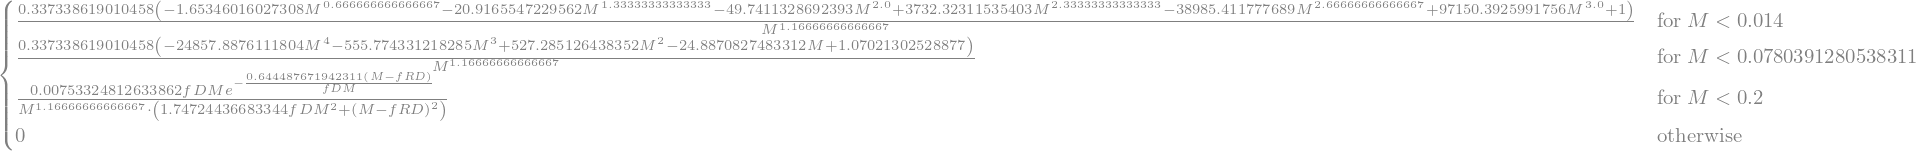

In [40]:
# Combine amplitude pieces 
# AmpInt has a major issue in the deltas part
fRDi, fDMi = fringdown(eta, chis, chia, finspin) 
fMRDJoinAmp = fmaxCalc(fRDi, fDMi, eta, chi)
f_CUT = 0.2

Amp_all = Piecewise((amp0*AmpIns, Mf < AMP_fJoin_INS), (amp0*AmpInt, Mf < fMRDJoinAmp), (amp0*AmpMRD, Mf < f_CUT), (0, True))
Amp_all

In [41]:
fMRDJoinAmp = fmaxCalc(fRDi, fDMi, eta, chi)
print(AMP_fJoin_INS)
print(fMRDJoinAmp)
print(amp0)

0.014
0.07803912805383108
0.33733861901045753


In [42]:
Amp_all_numpy = lambdify([Mf,fRD,fDM], Amp_all, 'numpy')#Function had a dependance on fRD and fDM that wasn't accounted for here
Mfs = np.linspace(0.001, 0.1, 1000)

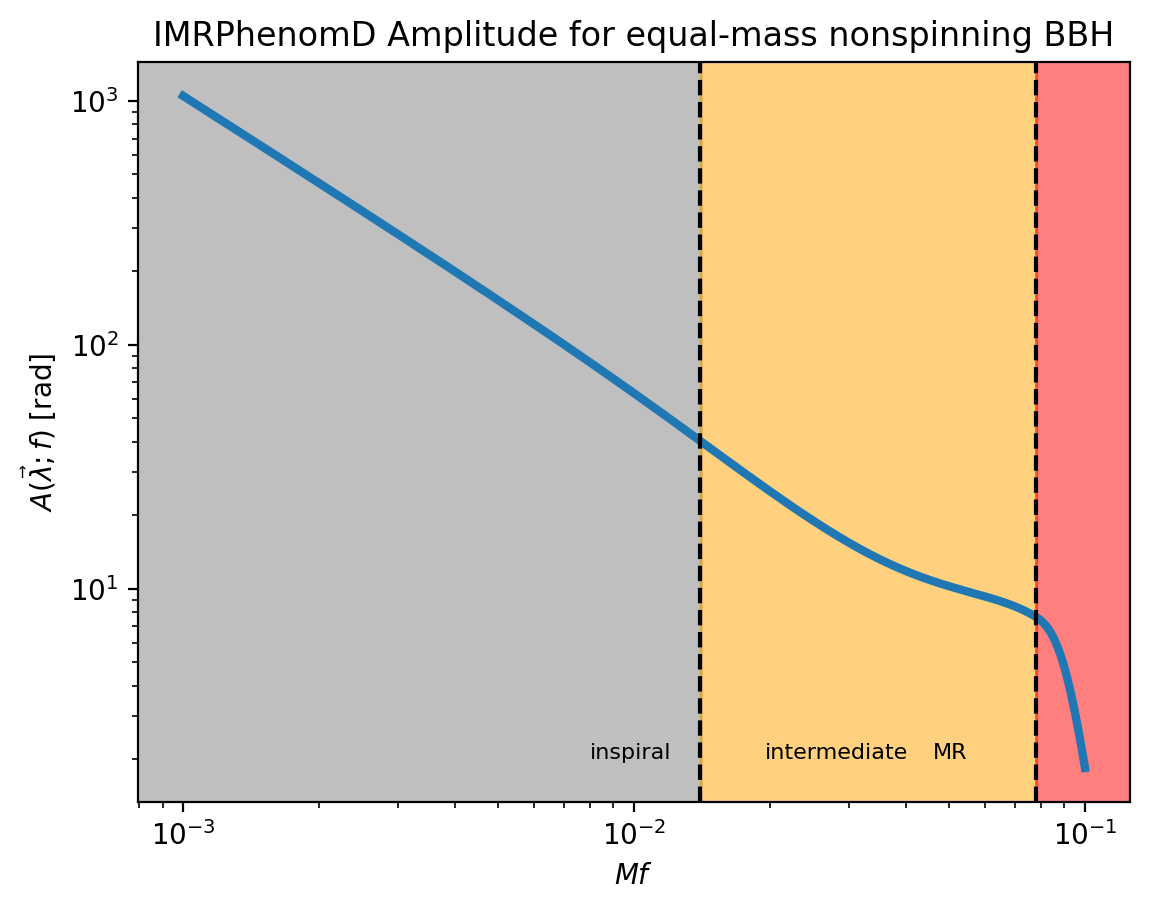

In [43]:
fRDi, fDMi = fringdown(eta, chis, chia, finspin)  
fMRDJoinAmp = fmaxCalc(fRDi, fDMi, eta, chi) #This had to be rerun before plotting
fig, ax = plt.subplots()
plt.loglog(Mfs, Amp_all_numpy(Mfs, fRDi, fDMi), lw=3)
plt.xlabel(r'$Mf$')
plt.ylabel(r'$A(\vec\lambda; f)$ [rad]')
plt.axvline(AMP_fJoin_INS, c='k', ls='--')
plt.axvline(fMRDJoinAmp, c='k', ls='--')
ax.add_patch(
    mpl.patches.Rectangle(
        (1e-4, -500),   # (x,y)
        AMP_fJoin_INS, 2000, # width, height
        fill=True, color='gray', alpha=0.5, zorder=1
    )
)
ax.add_patch(
    mpl.patches.Rectangle(
        (AMP_fJoin_INS, -500),   # (x,y)
        fMRDJoinAmp - AMP_fJoin_INS, 2000, # width, height
        fill=True, color='orange', alpha=0.5, zorder=1
    )
)
ax.add_patch(
    mpl.patches.Rectangle(
        (fMRDJoinAmp, -500),   # (x,y)
        0.2, 2000, # width, height
        fill=True, color='red', alpha=0.5, zorder=1
    )
)
plt.annotate('inspiral', (8e-3, 2), fontsize=8)
plt.annotate('intermediate', (1.95e-2, 2), fontsize=8)
plt.annotate('MR', (4.6e-2, 2), fontsize=8)
plt.title('IMRPhenomD Amplitude for equal-mass nonspinning BBH');

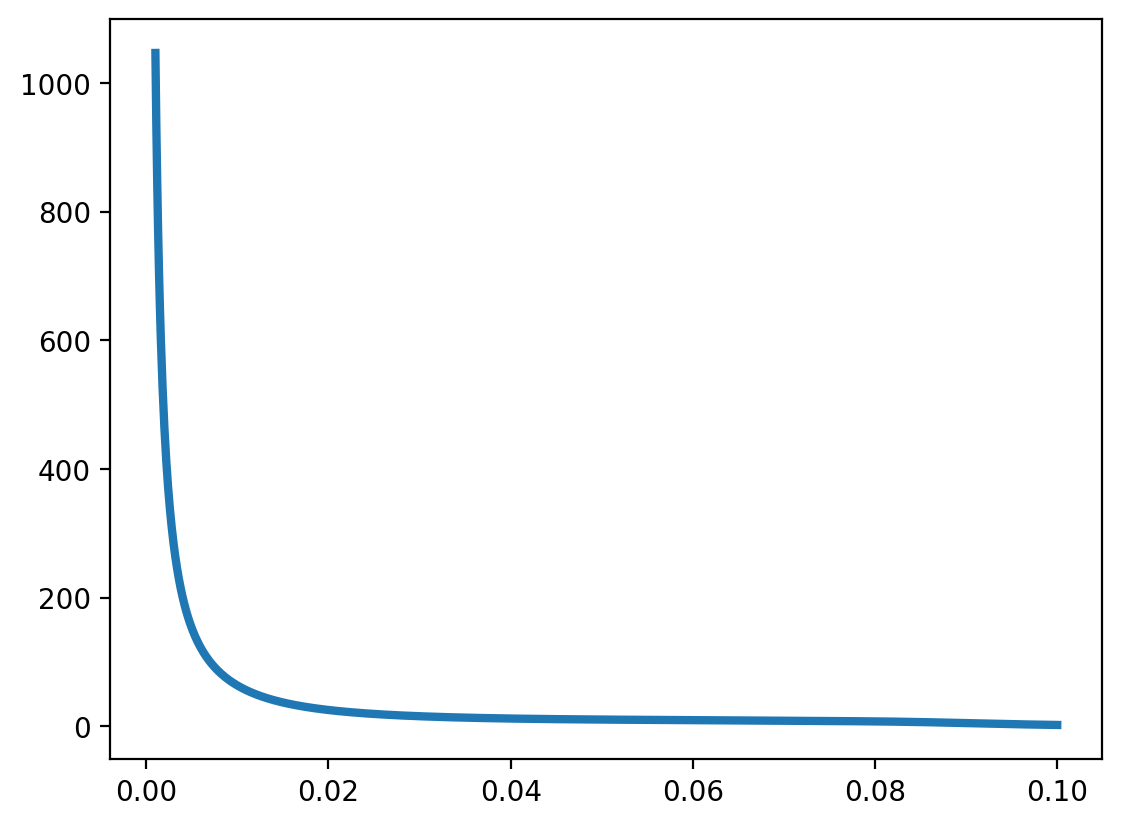

In [44]:
plt.plot(Mfs, Amp_all_numpy(Mfs, fRDi, fDMi), lw=3)

But, if we just want to  use a linear spline, we can just create a spline from the frequency series of amplitudes below.
Notice that the linear spline and the amplitude plot from above are very similar in their structure, we could still stick to the linear spline to simplify our analysis

In [45]:
phi0, fRef = 0, 0
deltaF = 1/8.0
m1, m2 = 30, 30
m1_SI, m2_SI = m1*lal.MSUN_SI, m2*lal.MSUN_SI
chi1, chi2 = 0, 0
f_min, f_max = 20.0, 4096.0
distance = 500e6*lal.PC_SI
extraParams = None
NRTidal_version = ls.NoNRT_V

# https://git.ligo.org/lscsoft/lalsuite/-/blob/master/lalsimulation/lib/LALSimIMRPhenomD.c#L105
htilde = ls.SimIMRPhenomDGenerateFD(phi0, fRef, deltaF, m1_SI, m2_SI, chi1, chi2, f_min, f_max, distance, extraParams, NRTidal_version)

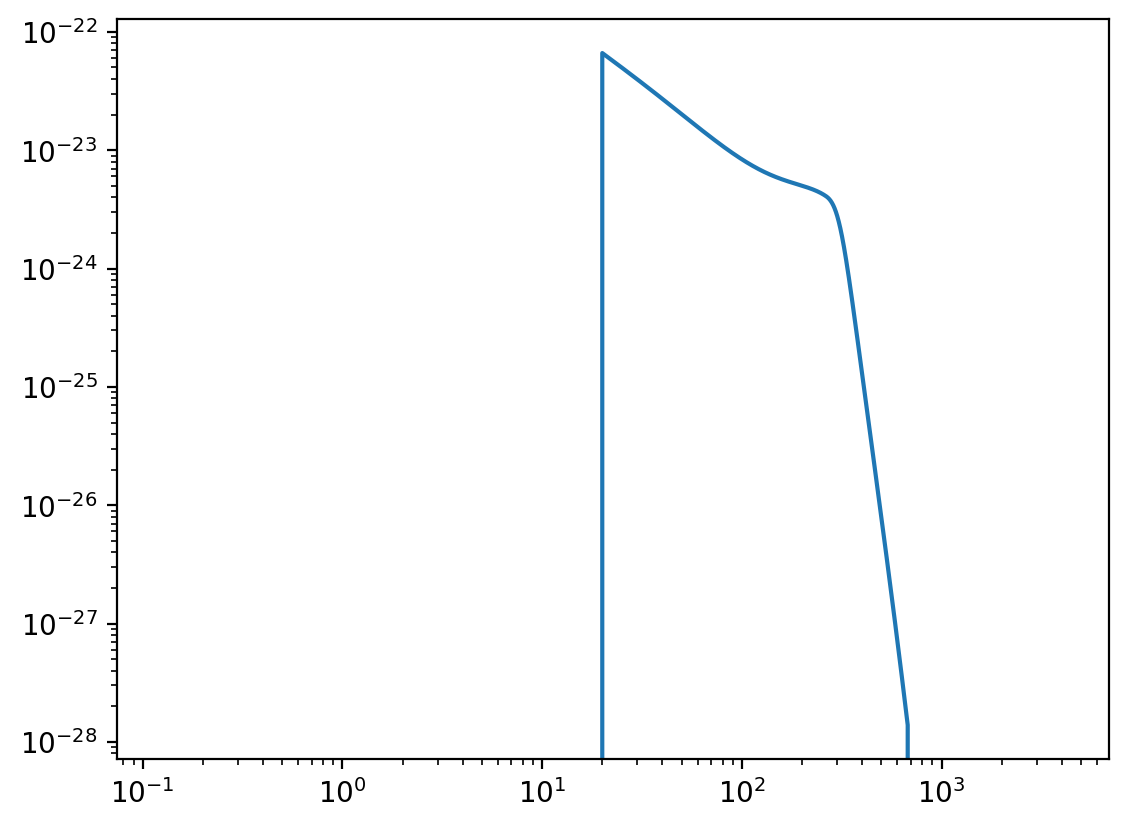

In [46]:
freqs = htilde.deltaF * np.arange(htilde.data.length)
plt.loglog(freqs, np.abs(htilde.data.data));

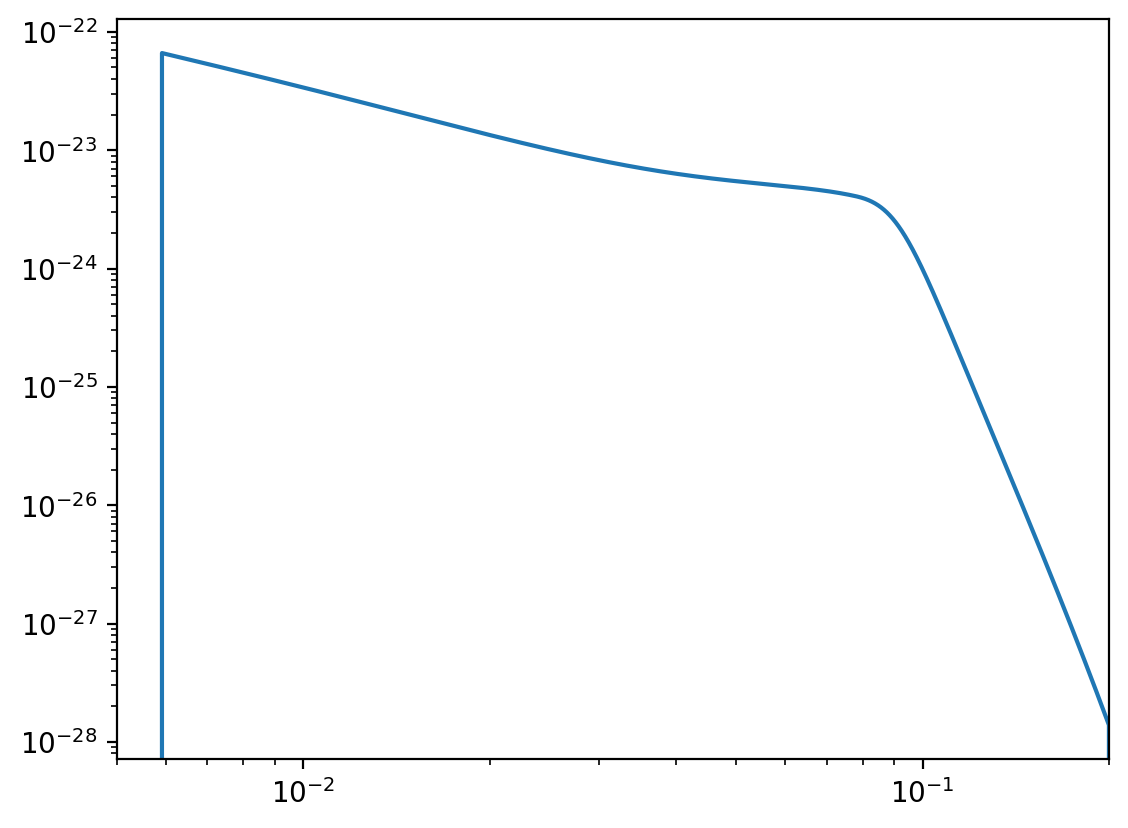

In [47]:
Mtot = m1+m2
freqs_Mf = freqs * Mtot*lal.MTSUN_SI
amp_lal = np.abs(htilde.data.data)
plt.loglog(freqs_Mf, amp_lal)
plt.xlim([5e-3, 0.2]);

In [48]:
# Drop frequency points as needed to reduce number of bins
amp_lal_spl = InterpolatedUnivariateSpline(freqs_Mf, amp_lal, k=1)
amp_lal_spl(0.05)

array(5.46907952e-24)